# Selecting the best model using cross-validation
## K-fold cross validation steps:

- Choose a number for k and split the data into k equal partitions (folds).
- Use fold 1 as a testing set and the union of all other folds as a training set.
- Train the model and test accuracy.
- Repeat the above 2 steps k-1 times, using different fold as a testing set each time.
- Use the average testing accuracy (cross-validated accuracy) as the estimate of out of sample accuracy.

## Cross-validation tuning parameters

- Goal: select the tunning parameter (k) for KNN which produce a model that the best generalises to out of sample data.

In [2]:
from sklearn import datasets
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
import matplotlib.pylab as plt
import numpy as np
import pandas as pd


/Users/themba/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
iris = datasets.load_iris()
X = iris.data        # Feature metrix
y = iris.target      # Response vector

In [4]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy') # cv= number of folds to use
scores.mean()

0.96666666666666679

In [5]:
K = [k for k in range(1,30)]
k_scores = []
for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy') # cv= number of folds to use
    k_scores.append(scores.mean())
  
i=np.where(k_scores==max(k_scores))[0][-1]
k=K[i] #This is the best value for k.

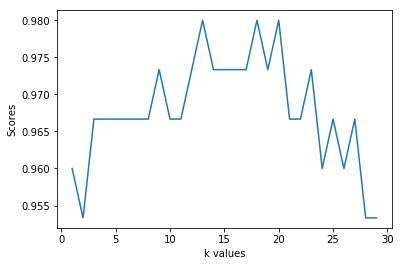

In [6]:
#Let's visualise our 
plt.plot(K,k_scores)
plt.xlabel('k values')
plt.ylabel('Scores')
plt.show()

## Cross-validation for choosing best model

In [7]:
# Firstly we recalculate the accuracy using the best knn model.
knn = KNeighborsClassifier(n_neighbors=k)
cross_val_score(knn,X,y,cv=10,scoring='accuracy').mean()

0.98000000000000009

In [8]:
#Logistic regression
logReg = LogisticRegression()
cross_val_score(logReg,X,y,cv=10,scoring='accuracy').mean()

0.95333333333333337

** Since knn mean accuracy is grater then that of Logistic regression, we conclude that knn is the best model for this case.**

## Cross-validation for features

In [9]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv')
features = ['TV','radio','newspaper']
response = 'sales'

X = data[features]
y = data[response]

In [10]:
linReg = LinearRegression()
scores = cross_val_score(linReg,X,y,cv=10,scoring='mean_squared_error')
rmse_scores = np.sqrt(-1*scores)
rmse_scores.mean()

/Users/themba/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/themba/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/themba/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/themba/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed 

1.6913531708051792

In [12]:
features1 = ['TV','radio']
X = data[features1]
linReg = LinearRegression()
scores = cross_val_score(linReg,X,y,cv=10,scoring='mean_squared_error')
rmse_scores = np.sqrt(-1*scores)
rmse_scores.mean()



/Users/themba/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/themba/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/themba/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/themba/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed 

1.6796748419090766

** The model without the feature "Newspaper" is the best since it has a less value of rmse**